![image.png](attachment:image.png)

#### *Aluno:*
>Tauan de Jesus Santos

# Tarefa II

Neste projeto, estamos construindo um credit scoring para cartão de crédito, em um desenho amostral com 15 safras, e utilizando 12 meses de performance.

Carregue a base de dados ```credit_scoring.ftr```.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import t

import warnings
warnings.filterwarnings("ignore")

df = pd.read_feather('credit_scoring.ftr')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
0,2015-01-01,5733,F,N,N,0,Empresário,Médio,Solteiro,Casa,43,6.873973,1.0,2515.39,False
1,2015-01-01,727,F,S,S,0,Assalariado,Médio,Casado,Casa,35,4.526027,2.0,3180.19,False
2,2015-01-01,6374,F,N,N,2,Assalariado,Médio,Casado,Casa,31,0.243836,4.0,1582.29,False
3,2015-01-01,9566,F,N,N,0,Assalariado,Médio,Casado,Casa,54,12.772603,2.0,13721.17,False
4,2015-01-01,9502,F,S,N,0,Assalariado,Superior incompleto,Solteiro,Casa,31,8.432877,1.0,2891.08,False


In [5]:
from pycaret.regression import create_model

## Amostragem

Separe os três últimos meses como safras de validação *out of time* (oot).

Variáveis:<br>
Considere que a variável ```data_ref``` não é uma variável explicativa, é somente uma variável indicadora da safra, e não deve ser utilizada na modelagem. A variávei ```index``` é um identificador do cliente, e também não deve ser utilizada como covariável (variável explicativa). As restantes podem ser utilizadas para prever a inadimplência, incluindo a renda.


In [6]:
df.columns

Index(['data_ref', 'index', 'sexo', 'posse_de_veiculo', 'posse_de_imovel',
       'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil',
       'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia',
       'renda', 'mau'],
      dtype='object')

In [7]:
dataset = df.sample(50000)

In [8]:
dataset.drop(['data_ref','index'], axis=1, inplace=True)

## Descritiva básica univariada

- Descreva a base quanto ao número de linhas, número de linhas para cada mês em ```data_ref```.
- Faça uma descritiva básica univariada de cada variável. Considere as naturezas diferentes: qualitativas e quantitativas.

In [9]:
#Data minima
df.data_ref.min()

Timestamp('2015-01-01 00:00:00')

In [10]:
#Data maxima
df.data_ref.max()

Timestamp('2016-03-01 00:00:00')

In [11]:
# Retornando os ultimos 3 meses
meses = 3
data = pd.Series(pd.date_range('1/1/2016', periods = meses, freq = 'MS'))
date = pd.DataFrame(data)
date = date.rename({0:'oot'}, axis = 'columns')
date

,oot
0,2016-01-01
1,2016-02-01
2,2016-03-01


In [12]:
print('número de linhas: {0}'.format(df.shape[0]))
date.value_counts()
df.data_ref.value_counts()

número de linhas: 750000


2015-01-01    50000
2015-02-01    50000
2015-03-01    50000
2015-04-01    50000
2015-05-01    50000
2015-06-01    50000
2015-07-01    50000
2015-08-01    50000
2015-09-01    50000
2015-10-01    50000
2015-11-01    50000
2015-12-01    50000
2016-01-01    50000
2016-02-01    50000
2016-03-01    50000
Name: data_ref, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   data_ref               750000 non-null  datetime64[ns]
 1   index                  750000 non-null  int64         
 2   sexo                   750000 non-null  object        
 3   posse_de_veiculo       750000 non-null  object        
 4   posse_de_imovel        750000 non-null  object        
 5   qtd_filhos             750000 non-null  int64         
 6   tipo_renda             750000 non-null  object        
 7   educacao               750000 non-null  object        
 8   estado_civil           750000 non-null  object        
 9   tipo_residencia        750000 non-null  object        
 10  idade                  750000 non-null  int64         
 11  tempo_emprego          624043 non-null  float64       
 12  qt_pessoas_residencia  750000 non-null  floa

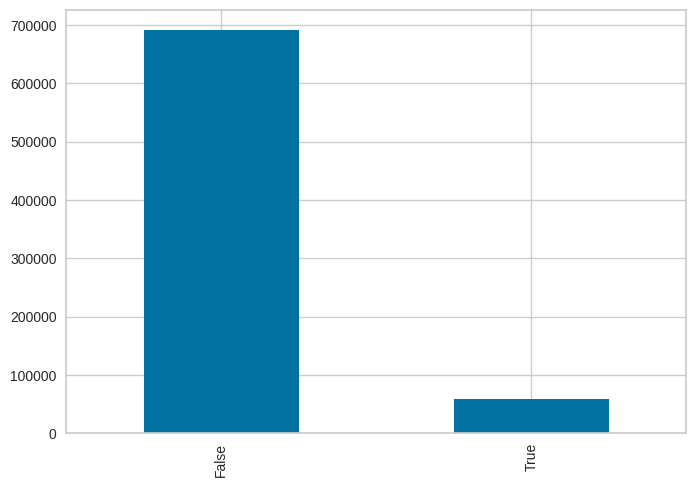

In [14]:
var = 'mau'
grafico_barras = df[var].value_counts().plot.bar()

<Figure size 800x550 with 0 Axes>

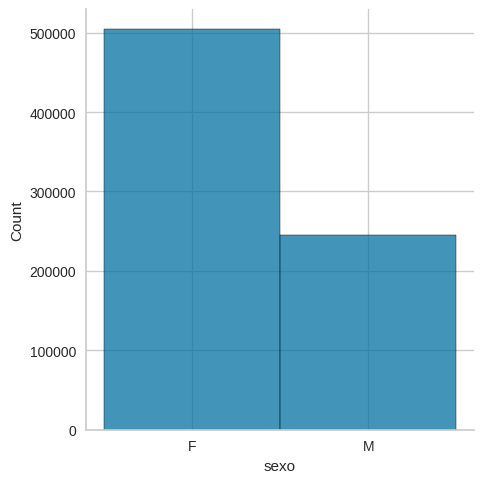

In [15]:
df.sexo.value_counts()
plt.clf()
var = "sexo"
sns.displot(df, x = var, bins = 50)
plt.show()

<Figure size 800x550 with 0 Axes>

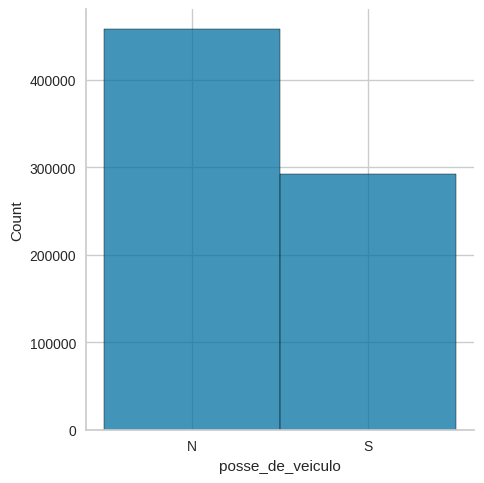

In [16]:
df.posse_de_veiculo.value_counts()
plt.clf()
var = "posse_de_veiculo"
sns.displot(df, x = var, bins = 50)
plt.show()

<Figure size 800x550 with 0 Axes>

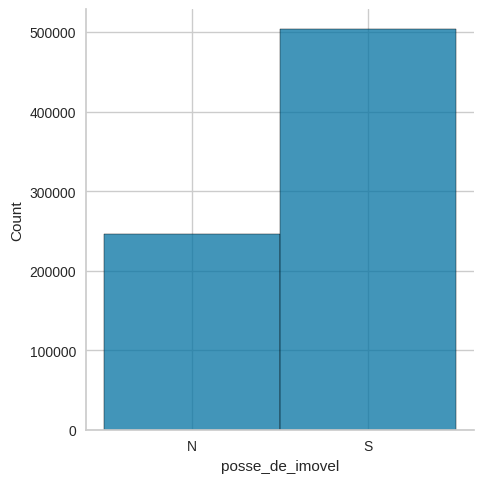

In [17]:
df.posse_de_imovel.value_counts()
plt.clf()
var = "posse_de_imovel"
sns.displot(df, x = var, bins = 50)
plt.show()

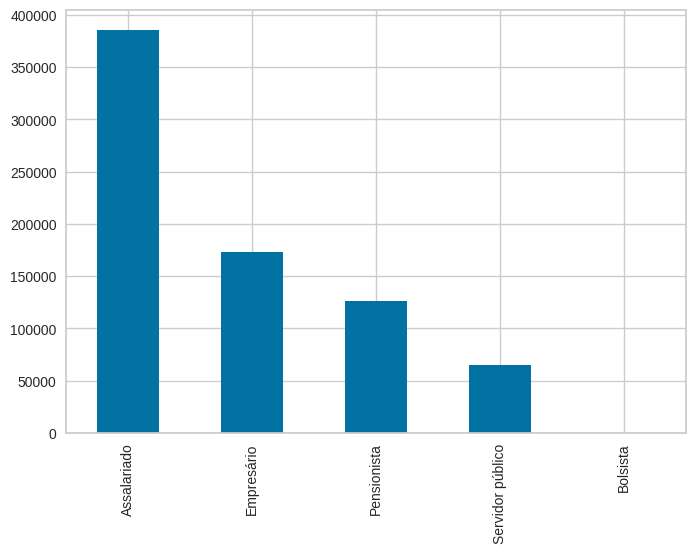

In [18]:
var = 'tipo_renda'
grafico_barras = df[var].value_counts().plot.bar()

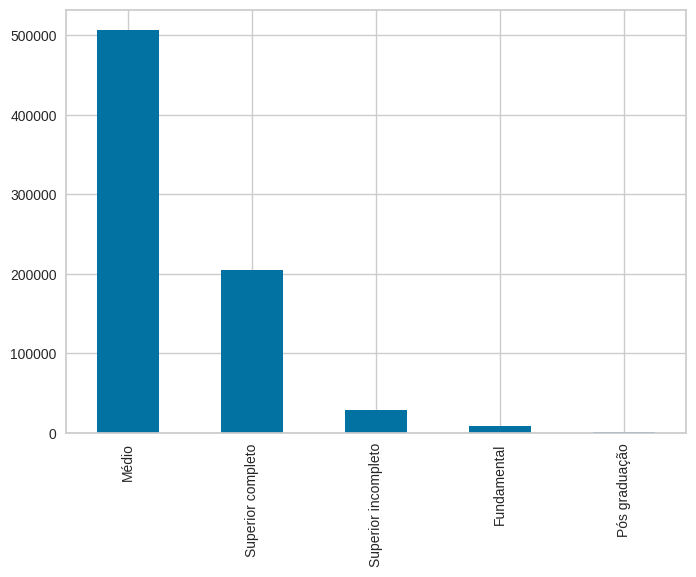

In [19]:
var = 'educacao'
grafico_barras = df[var].value_counts().plot.bar()

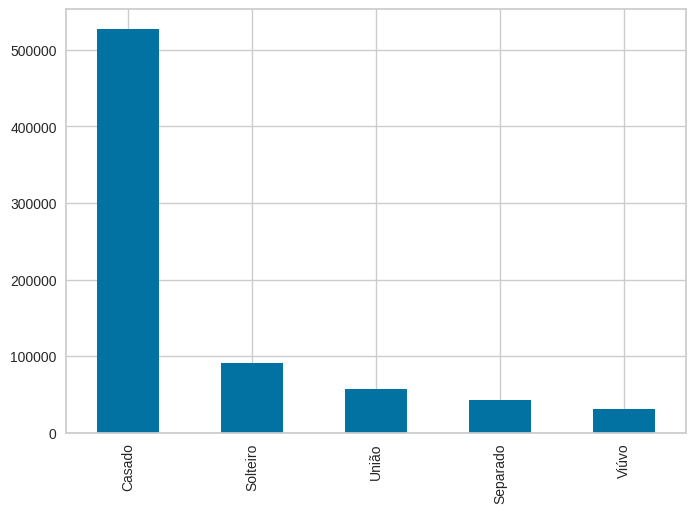

In [20]:
var = 'estado_civil'
grafico_barras = df[var].value_counts().plot.bar()

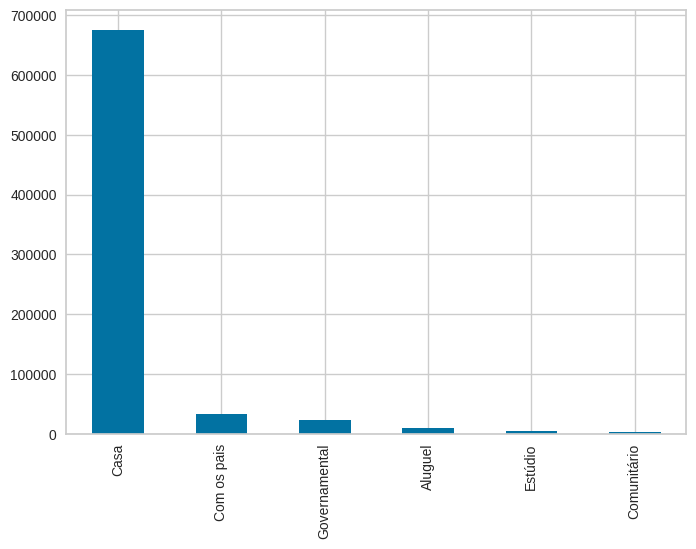

In [21]:
var = 'tipo_residencia'
grafico_barras = df[var].value_counts().plot.bar()

<Figure size 800x550 with 0 Axes>

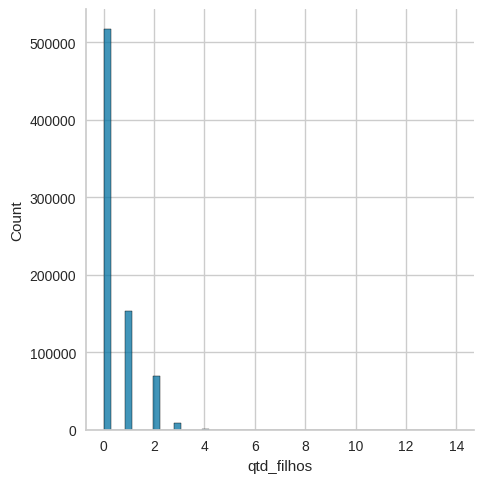

In [22]:
plt.clf()
var = "qtd_filhos"
sns.displot(df, x = var, bins = 50)
plt.show()

<Figure size 800x550 with 0 Axes>

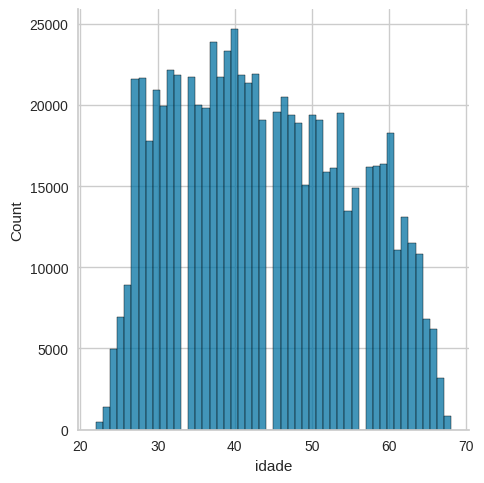

In [23]:
plt.clf()
var = "idade"
sns.displot(df, x = var, bins = 50)
plt.show()

<Figure size 800x550 with 0 Axes>

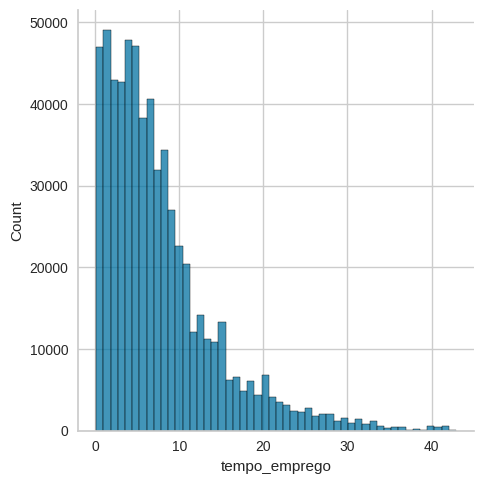

In [24]:
plt.clf()
var = "tempo_emprego"
sns.displot(df, x = var, bins = 50)
plt.show()

<Figure size 800x550 with 0 Axes>

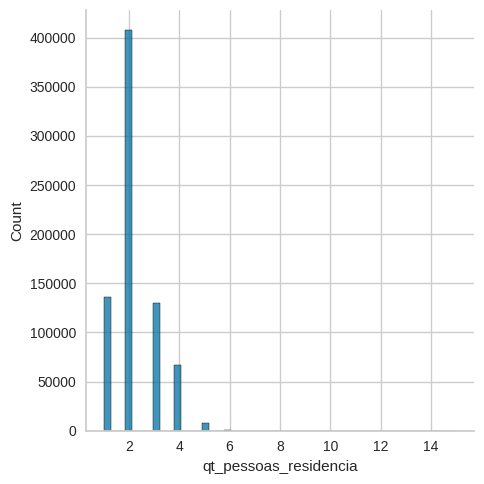

In [25]:
plt.clf()
var = "qt_pessoas_residencia"
sns.displot(df, x = var, bins = 50)
plt.show()

<Figure size 800x550 with 0 Axes>

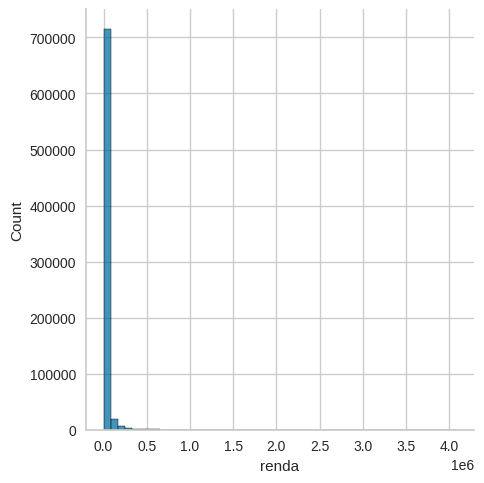

In [26]:
plt.clf()
var = "renda"
sns.displot(df, x = var, bins = 50)
plt.show()

## Descritiva bivariada

Faça uma análise descritiva bivariada de cada variável

<Axes: xlabel='sexo', ylabel='mau'>

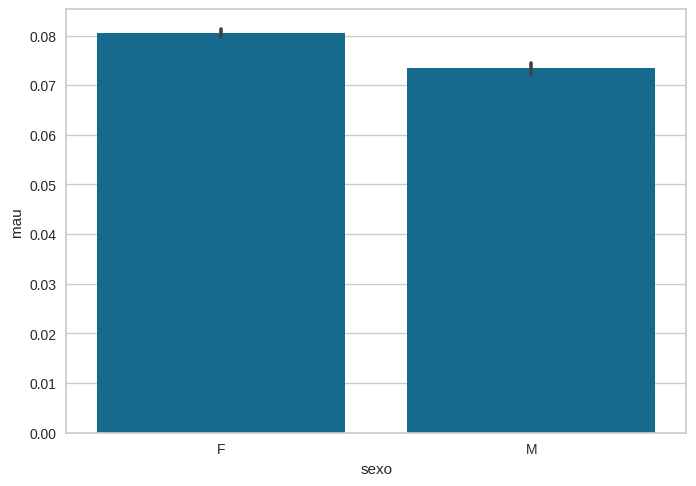

In [27]:
sns.barplot(x='sexo', y = 'mau', data=df)

<Axes: xlabel='posse_de_veiculo', ylabel='mau'>

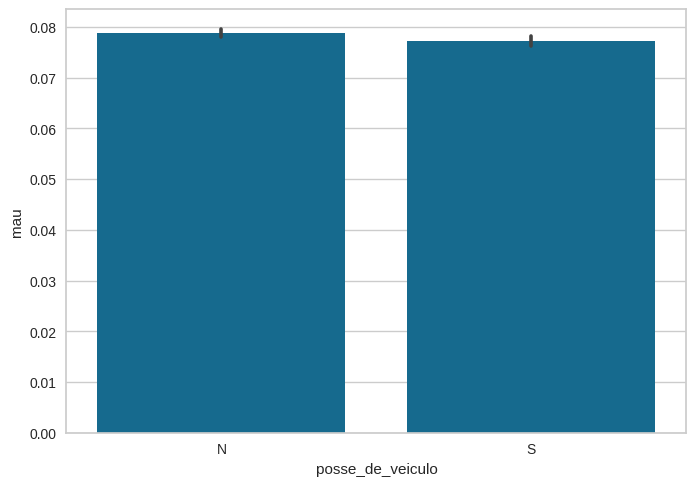

In [28]:
sns.barplot(x='posse_de_veiculo', y = 'mau', data=df)

<Axes: xlabel='posse_de_imovel', ylabel='mau'>

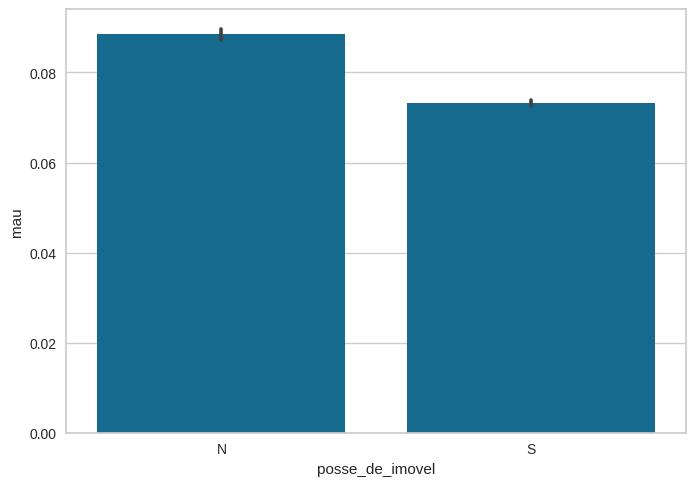

In [29]:
sns.barplot(x='posse_de_imovel', y = 'mau', data=df)

<Axes: xlabel='tipo_renda', ylabel='mau'>

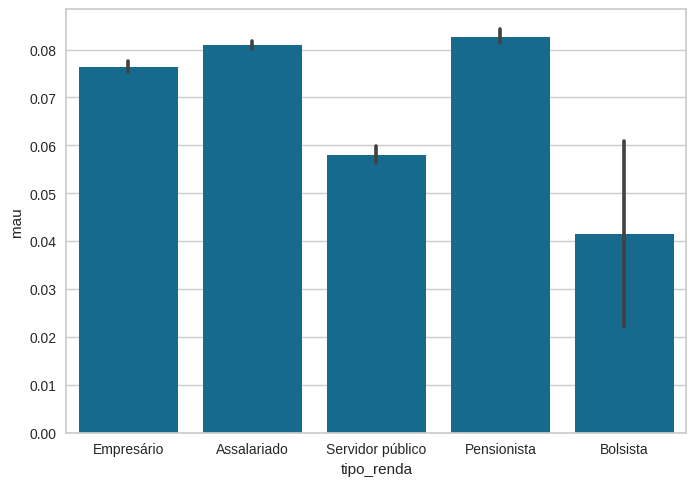

In [30]:
sns.barplot(x='tipo_renda', y = 'mau', data=df)

[Text(0, 0, 'Médio'),
 Text(1, 0, 'Superior incompleto'),
 Text(2, 0, 'Superior completo'),
 Text(3, 0, 'Fundamental'),
 Text(4, 0, 'Pós graduação')]

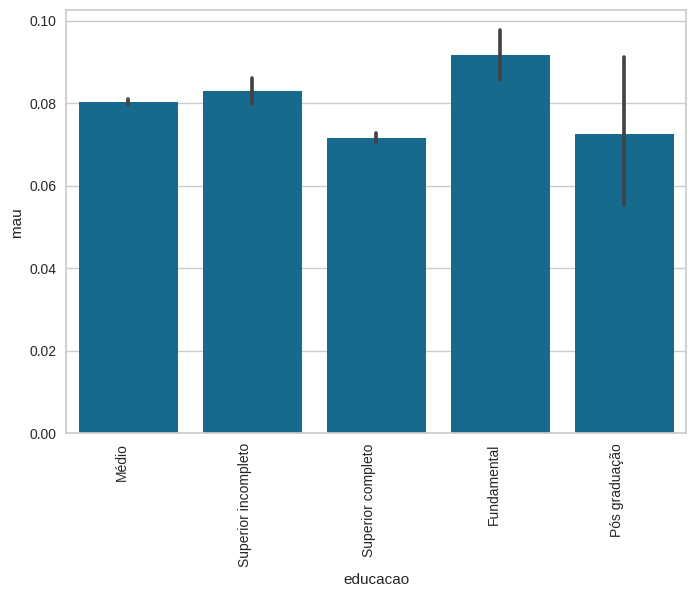

In [31]:
educacao = sns.barplot(x='educacao', y = 'mau', data=df)
educacao.set_xticklabels(educacao.get_xticklabels(), rotation=90, horizontalalignment='right')

<Axes: xlabel='estado_civil', ylabel='mau'>

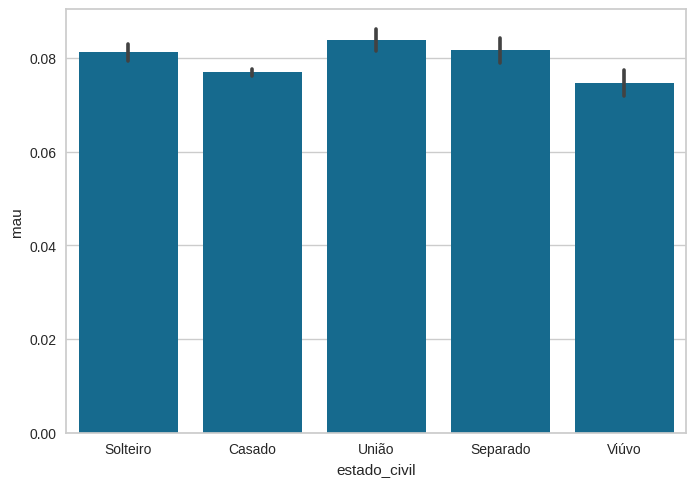

In [32]:
sns.barplot(x='estado_civil', y = 'mau', data=df)

[Text(0, 0, 'Casa'),
 Text(1, 0, 'Com os pais'),
 Text(2, 0, 'Aluguel'),
 Text(3, 0, 'Comunitário'),
 Text(4, 0, 'Governamental'),
 Text(5, 0, 'Estúdio')]

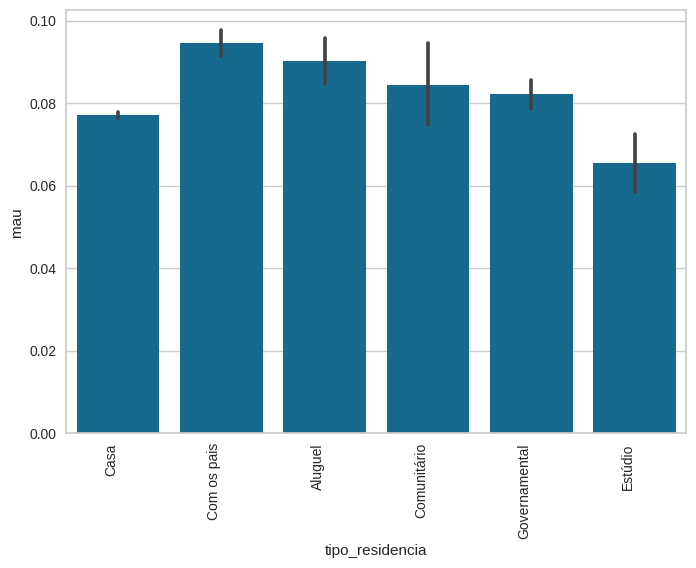

In [33]:
tipo_residencia = sns.barplot(x='tipo_residencia', y = 'mau', data=df)
tipo_residencia.set_xticklabels(tipo_residencia.get_xticklabels(), rotation=90, horizontalalignment='right')

## Desenvolvimento do modelo

Desenvolva um modelo de *credit scoring* através de uma regressão logística.

- Trate valores missings e outliers
- Trate 'zeros estruturais'
- Faça agrupamentos de categorias conforme vimos em aula
- Proponha uma equação preditiva para 'mau'
- Caso hajam categorias não significantes, justifique

In [34]:
df.isna().sum()

data_ref                      0
index                         0
sexo                          0
posse_de_veiculo              0
posse_de_imovel               0
qtd_filhos                    0
tipo_renda                    0
educacao                      0
estado_civil                  0
tipo_residencia               0
idade                         0
tempo_emprego            125957
qt_pessoas_residencia         0
renda                         0
mau                           0
dtype: int64

In [35]:
df['tempo_emprego'].fillna(df['tempo_emprego'].mean())

0          6.873973
1          4.526027
2          0.243836
3         12.772603
4          8.432877
            ...    
749995     3.038356
749996     7.748574
749997    10.375342
749998    13.780822
749999    10.375342
Name: tempo_emprego, Length: 750000, dtype: float64

In [36]:
metadados = pd.DataFrame(df.dtypes, columns=['dtype'])
metadados['valores_unicos'] = df.nunique()

metadados

,dtype,valores_unicos
data_ref,datetime64[ns],15
index,int64,16650
sexo,object,2
posse_de_veiculo,object,2
posse_de_imovel,object,2
qtd_filhos,int64,8
tipo_renda,object,5
educacao,object,5
estado_civil,object,5
tipo_residencia,object,6


In [37]:
df['mau'] = df.mau.astype('int64')

In [38]:
def IV(variavel, resposta):
    tab = pd.crosstab(variavel, resposta, margins=True, margins_name='total')

    rótulo_evento = tab.columns[0]
    rótulo_nao_evento = tab.columns[1]

    tab['pct_evento'] = tab[rótulo_evento]/tab.loc['total',rótulo_evento]
    tab['ep'] = tab[rótulo_evento]/tab.loc['total',rótulo_evento]

    tab['pct_nao_evento'] = tab[rótulo_nao_evento]/tab.loc['total',rótulo_nao_evento]
    tab['woe'] = np.log(tab.pct_evento/tab.pct_nao_evento)
    tab['iv_parcial'] = (tab.pct_evento - tab.pct_nao_evento)*tab.woe
    return tab['iv_parcial'].sum()

In [39]:
iv_sexo = IV(df.sexo, df.mau)
print(f'IV da variável SEXO: {iv_sexo:.1%}')

IV da variável SEXO: 0.2%


In [40]:
metadados = pd.DataFrame(df.dtypes, columns=['dtype'])
metadados['valores_unicos'] = df.nunique()
metadados['variavel'] = 'covariavel'
metadados.loc['mau','variavel'] = 'resposta'
metadados.loc['bom','variavel'] = 'resposta'
metadados

,dtype,valores_unicos,variavel
data_ref,datetime64[ns],15.0,covariavel
index,int64,16650.0,covariavel
sexo,object,2.0,covariavel
posse_de_veiculo,object,2.0,covariavel
posse_de_imovel,object,2.0,covariavel
qtd_filhos,int64,8.0,covariavel
tipo_renda,object,5.0,covariavel
educacao,object,5.0,covariavel
estado_civil,object,5.0,covariavel
tipo_residencia,object,6.0,covariavel


In [41]:
var='idade'
IV(pd.qcut(df[var],5,duplicates='drop'), df.mau)

0.01796842289500074

In [42]:
for var in metadados[metadados.variavel=='covariavel'].index:
    if (metadados.loc[var, 'valores_unicos']>6):
        metadados.loc[var, 'IV'] = IV(pd.qcut(df[var],5,duplicates='drop'), df.mau)
    else:
        metadados.loc[var, 'IV'] = IV(df[var], df.mau)


metadados

,dtype,valores_unicos,variavel,IV
data_ref,datetime64[ns],15.0,covariavel,0.345982
index,int64,16650.0,covariavel,0.002664
sexo,object,2.0,covariavel,0.002185
posse_de_veiculo,object,2.0,covariavel,0.000108
posse_de_imovel,object,2.0,covariavel,0.009693
qtd_filhos,int64,8.0,covariavel,0.000030
tipo_renda,object,5.0,covariavel,0.009360
educacao,object,5.0,covariavel,0.003547
estado_civil,object,5.0,covariavel,0.001126
tipo_residencia,object,6.0,covariavel,0.003045


In [43]:
def biv_discreta(var, df):
    df['bom'] = 1-df.mau
    g = df.groupby(var)

    biv = pd.DataFrame({'qt_bom': g['bom'].sum(),
                       'qt_mau': g['bom'].sum(),
                       'mau':g['bom'].mean(),
                       var: g['bom'].mean().index,
                       'cont':g[var].count()})
    biv['ep'] = (biv.mau*(1-biv.mau)/biv.cont)**.5
    biv['mau_sup'] = biv.mau+t.ppf([0.975], biv.cont-1)*biv.ep
    biv['mau_inf'] = biv.mau+t.ppf([0.025], biv.cont-1)*biv.ep

    biv['logit'] = np.log(biv.mau/(1-biv.mau))
    biv['logit_sup'] = np.log(biv.mau_sup/(1-biv.mau_sup))
    biv['logit_inf'] = np.log(biv.mau_sup/(1-biv.mau_inf))

    tx_mau_geral = df.mau.mean()
    woe_geral = np.log(df.mau.mean() / (1 - df.mau.mean()))

    biv['woe'] = biv.logit - woe_geral
    biv['woe_sup'] = biv.logit_sup - woe_geral
    biv['woe_inf'] = biv.logit_inf - woe_geral

    fig, ax = plt.subplots(2,1, figsize=(8,6))
    ax[0].plot(biv[var], biv.woe,  ':bo', label='woe')
    ax[0].plot(biv[var], biv.woe_sup, 'o:r', label='limite superior')
    ax[0].plot(biv[var], biv.woe_inf, 'o:r', label='limite superior')

    num_cat = biv.shape[0]
    ax[0].set_xlim([-.3, num_cat-.7])

    ax[0].set_ylabel("Weight of Evidence")
    ax[0].legend(bbox_to_anchor=(.83, 1.17), ncol=3)

    ax[0].set_xticks(list(range(num_cat)))
    ax[0].set_xticklabels(biv[var], rotation=15)

    ax[1] = biv.cont.plot.bar()
    return biv

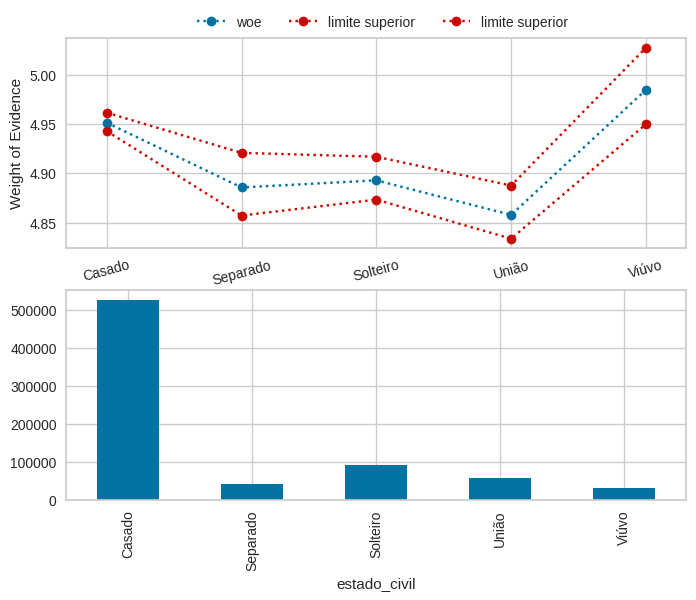

In [44]:
biv_discreta('estado_civil', df);

0.009314630323182816

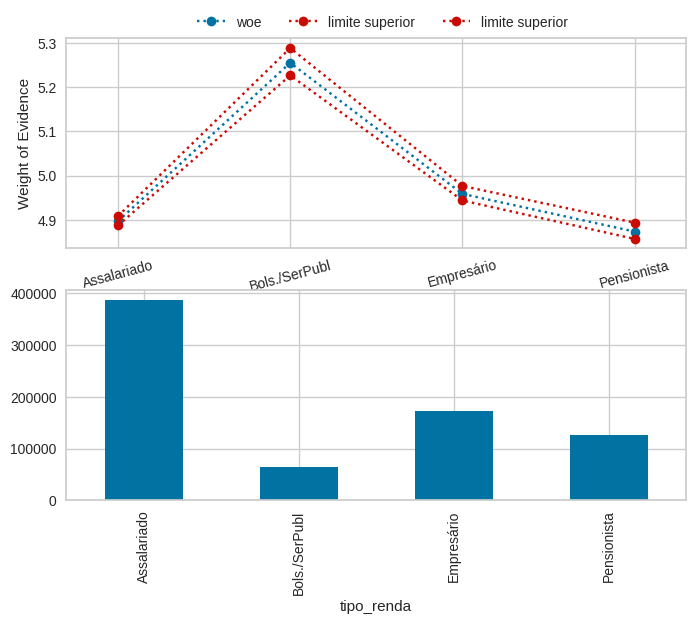

In [45]:
df2 = df.copy()
df2.tipo_renda.replace({'Bolsista': 'Bols./SerPubl', 'Servidor público': 'Bols./SerPubl'}, inplace=True)
biv_discreta('tipo_renda', df2)
IV(df2.tipo_renda, df.mau)

0.003546241385773477

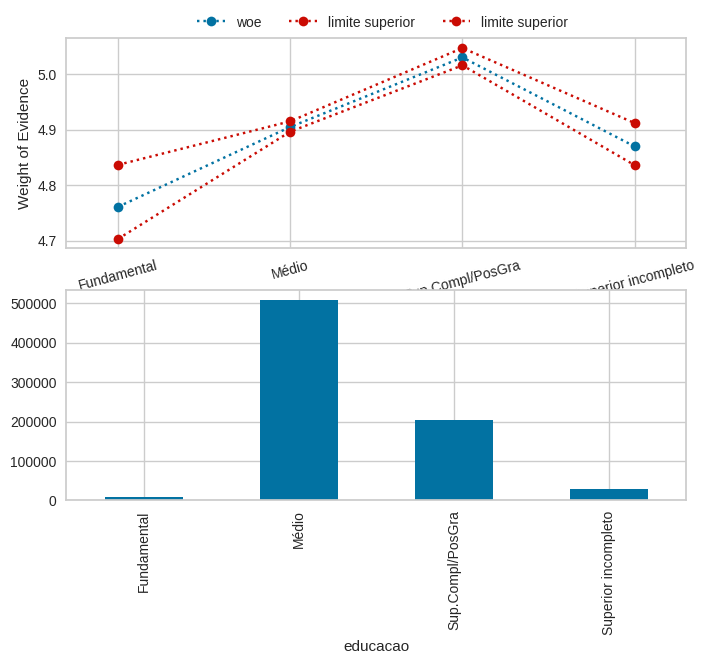

In [46]:
df2.educacao.replace({'Superior completo': 'Sup.Compl/PosGra', 'Pós graduação': 'Sup.Compl/PosGra'}, inplace=True)
biv_discreta('educacao', df2)
IV(df2.educacao, df.mau)

0.0023941390471014087

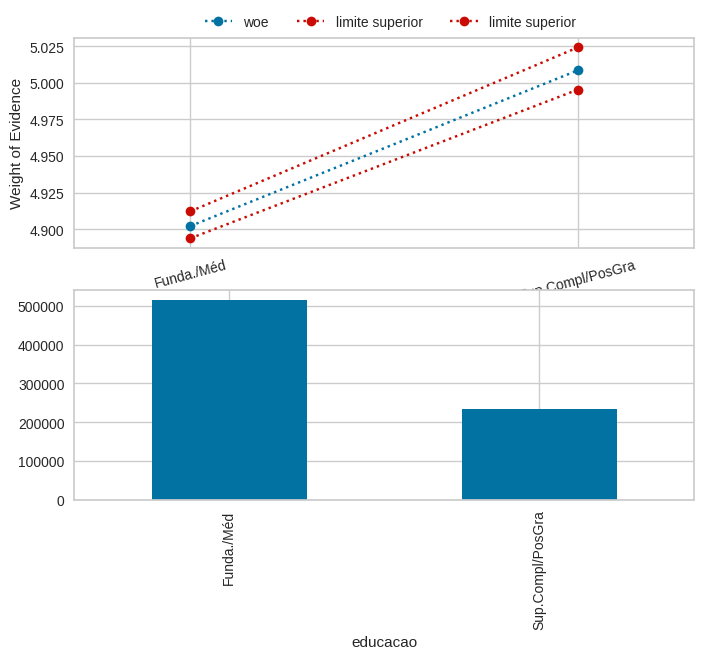

In [47]:
df2.educacao.replace({'Superior incompleto':'Sup.Compl/PosGra',
                      'Fundamental':'Funda./Méd',
                      'Médio': 'Funda./Méd'
                     }, inplace=True)
biv_discreta('educacao', df2)
IV(df2.educacao, df.mau)

## Avaliação do modelo

Avalie o poder discriminante do modelo pelo menos avaliando acurácia, KS e Gini.

Avalie estas métricas nas bases de desenvolvimento e *out of time*.

In [48]:
pd.crosstab(df['mau'], date['oot'])

oot,2016-01-01,2016-02-01,2016-03-01
mau,,,
0,1,1,1


### Criar um pipeline utilizando o sklearn pipeline

In [50]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from pycaret.classification import *


X_digits, y_digits = load_digits(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.3, random_state=10)

pca = PCA(n_components=20)

scaler = StandardScaler()

logistic = LogisticRegression(max_iter=200)

### Pré processamento
#### Substituição de nulos (nans)

In [51]:
X_digits.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [52]:
X_digits.shape

(1797, 64)

In [53]:
X_train.shape

(1257, 64)

In [54]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)

### Redução de dimensionalidade (PCA)
Aplicar PCA e diminuir a dimensionalidade para 5

In [55]:
pca.fit(X_train)
X_train =  pca.transform(X_train)

In [56]:
logistic.fit(X_train, y_train)

logistic.predict(X_train)

array([0, 0, 0, ..., 2, 1, 2])

In [57]:
X_test = scaler.transform(X_test)

In [58]:
X_test = pca.transform(X_test)

In [59]:
logistic.predict(X_test)

array([5, 2, 5, 4, 8, 3, 4, 3, 3, 0, 8, 7, 0, 1, 8, 6, 9, 7, 9, 7, 1, 6,
       6, 7, 8, 8, 5, 8, 9, 9, 3, 3, 7, 3, 4, 1, 9, 2, 5, 4, 2, 1, 0, 1,
       2, 9, 6, 1, 9, 4, 4, 5, 8, 4, 8, 5, 9, 7, 8, 0, 4, 5, 8, 4, 7, 9,
       0, 7, 1, 3, 9, 3, 3, 8, 0, 7, 3, 6, 5, 2, 0, 8, 8, 0, 1, 2, 2, 8,
       8, 8, 2, 6, 3, 4, 7, 9, 8, 2, 9, 2, 5, 0, 8, 0, 4, 8, 8, 0, 6, 7,
       3, 3, 9, 1, 2, 4, 6, 0, 8, 8, 1, 1, 7, 3, 9, 5, 2, 3, 3, 9, 7, 6,
       2, 5, 4, 3, 8, 7, 6, 7, 2, 7, 4, 9, 5, 1, 9, 8, 6, 1, 8, 1, 4, 0,
       9, 9, 1, 2, 3, 5, 0, 3, 4, 1, 5, 4, 9, 3, 5, 6, 4, 0, 8, 6, 7, 0,
       9, 9, 4, 7, 5, 5, 2, 0, 6, 7, 5, 3, 9, 7, 1, 3, 2, 8, 3, 3, 1, 7,
       1, 1, 1, 7, 1, 6, 7, 6, 9, 5, 2, 3, 5, 2, 9, 5, 4, 8, 2, 9, 1, 5,
       4, 2, 3, 9, 0, 2, 0, 2, 1, 0, 5, 0, 6, 4, 2, 1, 9, 0, 9, 0, 6, 9,
       4, 4, 9, 7, 5, 6, 1, 5, 7, 0, 8, 6, 2, 5, 1, 2, 3, 8, 4, 4, 3, 5,
       7, 9, 7, 2, 0, 2, 0, 9, 2, 8, 6, 3, 1, 0, 6, 6, 6, 7, 1, 6, 1, 7,
       6, 0, 6, 3, 7, 4, 6, 2, 2, 0, 8, 4, 7, 3, 3,

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.3, random_state=10)

# Define a PCA to Linear dimensionality reduction
pca_pipe = PCA(n_components=15)

# Define a Standard Scaler to normalize inputs
scaler_pipe = StandardScaler()

# set the tolerance to a large value to make the example faster
logistic_pipe = LogisticRegression(max_iter=200)

In [61]:
pipe = Pipeline(steps=[("scaler", scaler_pipe),
                       ("pca", pca_pipe),
                       ("logistic", logistic_pipe)])

In [62]:
pipe.named_steps

{'scaler': StandardScaler(),
 'pca': PCA(n_components=15),
 'logistic': LogisticRegression(max_iter=200)}

In [63]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=15)),
                ('logistic', LogisticRegression(max_iter=200))])

In [64]:
pipe.predict(X_train)

array([0, 0, 0, ..., 1, 8, 2])

In [65]:
pipe.predict(X_test)

array([5, 2, 5, 4, 8, 1, 4, 3, 3, 0, 8, 7, 0, 1, 8, 6, 9, 7, 9, 7, 1, 6,
       6, 7, 8, 8, 5, 8, 9, 9, 3, 3, 7, 3, 4, 1, 9, 2, 5, 4, 2, 1, 0, 1,
       2, 3, 6, 1, 9, 4, 4, 9, 8, 4, 8, 5, 9, 7, 1, 0, 4, 5, 8, 4, 7, 9,
       0, 7, 1, 3, 3, 3, 3, 8, 0, 7, 3, 6, 5, 2, 0, 8, 8, 0, 1, 2, 2, 8,
       8, 8, 2, 6, 3, 4, 7, 9, 8, 2, 9, 2, 5, 0, 8, 0, 4, 8, 8, 0, 6, 7,
       3, 3, 9, 1, 2, 4, 6, 0, 8, 8, 1, 1, 7, 8, 9, 5, 2, 3, 3, 9, 7, 6,
       2, 5, 4, 3, 8, 4, 6, 7, 2, 7, 4, 9, 5, 1, 9, 8, 6, 1, 8, 1, 4, 0,
       9, 9, 1, 2, 3, 5, 0, 3, 4, 1, 5, 4, 9, 3, 5, 6, 4, 0, 8, 6, 7, 0,
       9, 9, 4, 7, 9, 5, 2, 0, 6, 7, 5, 3, 9, 7, 1, 3, 2, 8, 8, 3, 1, 7,
       1, 1, 1, 7, 1, 6, 7, 6, 9, 5, 2, 3, 5, 2, 9, 5, 4, 8, 2, 0, 1, 5,
       4, 2, 3, 9, 0, 2, 0, 2, 1, 0, 5, 0, 6, 4, 2, 1, 9, 0, 9, 0, 6, 9,
       4, 4, 9, 7, 5, 6, 1, 8, 7, 0, 8, 6, 2, 5, 1, 2, 3, 8, 4, 4, 3, 5,
       7, 9, 7, 2, 0, 2, 0, 9, 2, 8, 6, 3, 1, 0, 6, 6, 6, 7, 1, 6, 1, 7,
       6, 0, 6, 3, 7, 4, 6, 2, 2, 0, 8, 4, 7, 3, 3,

In [66]:
pipe.named_steps

{'scaler': StandardScaler(),
 'pca': PCA(n_components=15),
 'logistic': LogisticRegression(max_iter=200)}

In [67]:
pipe.steps

[('scaler', StandardScaler()),
 ('pca', PCA(n_components=15)),
 ('logistic', LogisticRegression(max_iter=200))]

In [68]:
pipe[0]

StandardScaler()

In [69]:
pipe[1]

PCA(n_components=15)

In [70]:
pipe[2]

LogisticRegression(max_iter=200)

In [71]:
pipe[1].transform(X_train)

array([[  0.87102472, -12.61620502, -18.95622902, ...,   5.08850679,
         16.19490654,   3.84200328],
       [  7.39001754,  -7.8463233 , -16.49072601, ...,   8.41538021,
         20.06944263,   2.80267369],
       [  8.29000744, -10.02871803, -14.17168493, ...,   8.91613345,
         27.43844165,   4.1647645 ],
       ...,
       [-12.90633811, -12.77043724,  16.69157388, ...,   1.50682222,
         10.50945746,   6.64779314],
       [-12.20195103,  -2.58802521,   7.00738563, ...,   8.6113683 ,
         10.090712  ,   2.84070618],
       [-11.21460682,   2.6127395 ,   2.6827382 , ...,   3.942085  ,
         18.76039352,  -4.71634344]])

In [72]:
pca_pipe.transform(X_train)

array([[  0.87102472, -12.61620502, -18.95622902, ...,   5.08850679,
         16.19490654,   3.84200328],
       [  7.39001754,  -7.8463233 , -16.49072601, ...,   8.41538021,
         20.06944263,   2.80267369],
       [  8.29000744, -10.02871803, -14.17168493, ...,   8.91613345,
         27.43844165,   4.1647645 ],
       ...,
       [-12.90633811, -12.77043724,  16.69157388, ...,   1.50682222,
         10.50945746,   6.64779314],
       [-12.20195103,  -2.58802521,   7.00738563, ...,   8.6113683 ,
         10.090712  ,   2.84070618],
       [-11.21460682,   2.6127395 ,   2.6827382 , ...,   3.942085  ,
         18.76039352,  -4.71634344]])

### Criação de dummies

In [73]:
dummy = pd.get_dummies(df, columns=['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'])

In [74]:
dummy.dtypes

data_ref                         datetime64[ns]
index                                     int64
qtd_filhos                                int64
idade                                     int64
tempo_emprego                           float64
qt_pessoas_residencia                   float64
renda                                   float64
mau                                       int64
bom                                       int64
sexo_F                                    uint8
sexo_M                                    uint8
posse_de_veiculo_N                        uint8
posse_de_veiculo_S                        uint8
posse_de_imovel_N                         uint8
posse_de_imovel_S                         uint8
tipo_renda_Assalariado                    uint8
tipo_renda_Bolsista                       uint8
tipo_renda_Empresário                     uint8
tipo_renda_Pensionista                    uint8
tipo_renda_Servidor público               uint8
educacao_Fundamental                    

### Treinar um modelo de regressão logistia com o resultado

In [76]:
df = pd.read_feather('credit_scoring.ftr')

In [81]:
df.shape

(750000, 15)

In [82]:
dataset = df.sample(40000)

In [83]:
dataset.drop(['data_ref','index'], axis=1, inplace=True)

In [84]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Conjunto de dados para modelagem (treino e teste): ' + str(data.shape))
print('Conjunto de dados não usados no treino/teste, apenas como validação: ' + str(data_unseen.shape))

Conjunto de dados para modelagem (treino e teste): (38000, 13)
Conjunto de dados não usados no treino/teste, apenas como validação: (2000, 13)


In [85]:
#forçando a variável qnt de filhos como numérica
data.qtd_filhos = data.qtd_filhos.astype(float)

In [86]:
data.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
qtd_filhos,1.000000,-0.371181,-0.064757,0.890099,-0.035514,0.000311
idade,-0.371181,1.000000,0.323793,-0.338288,0.099846,-0.020537
tempo_emprego,-0.064757,0.323793,1.000000,-0.060622,0.497969,-0.128568
qt_pessoas_residencia,0.890099,-0.338288,-0.060622,1.000000,-0.042161,-0.002841
renda,-0.035514,0.099846,0.497969,-0.042161,1.000000,-0.067769
mau,0.000311,-0.020537,-0.128568,-0.002841,-0.067769,1.000000


In [87]:
data.mau.value_counts(normalize=True)

False    0.920921
True     0.079079
Name: mau, dtype: float64

In [88]:
exp_aula4 = setup(data = data, target = 'mau', experiment_name='credit_1',
                  normalize=True, normalize_method='zscore',
                  transformation=True, transformation_method = 'quantile',
                  fix_imbalance=True)

,Description,Value
0,Session id,8215
1,Target,mau
2,Target type,Binary
3,Original data shape,"(38000, 13)"
4,Transformed data shape,"(60392, 30)"
5,Transformed train set shape,"(48992, 30)"
6,Transformed test set shape,"(11400, 30)"
7,Ordinal features,3
8,Numeric features,5
9,Categorical features,7


In [89]:
best_model = compare_models(fold=4, sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9199,0.7670,0.0670,0.4511,0.1165,0.0984,0.1503,3.0025
gbc,Gradient Boosting Classifier,0.9185,0.7662,0.0813,0.4181,0.1352,0.1127,0.1562,9.6250
ada,Ada Boost Classifier,0.9103,0.7592,0.1673,0.3576,0.2269,0.1861,0.2018,3.4100
lr,Logistic Regression,0.8971,0.7508,0.2234,0.3004,0.2559,0.2019,0.2047,2.7725
xgboost,Extreme Gradient Boosting,0.9162,0.7480,0.0822,0.3637,0.1340,0.1082,0.1423,1.8525
lda,Linear Discriminant Analysis,0.8904,0.7323,0.2391,0.2781,0.2569,0.1981,0.1989,0.7800
rf,Random Forest Classifier,0.8992,0.7001,0.0960,0.2060,0.1309,0.0850,0.0920,5.3500
et,Extra Trees Classifier,0.8848,0.6501,0.1141,0.1669,0.1355,0.0761,0.0777,3.9450
nb,Naive Bayes,0.0983,0.6329,0.9876,0.0798,0.1477,0.0015,0.0165,0.6100
knn,K Neighbors Classifier,0.9035,0.6224,0.0879,0.2230,0.1261,0.0851,0.0956,3.8800


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

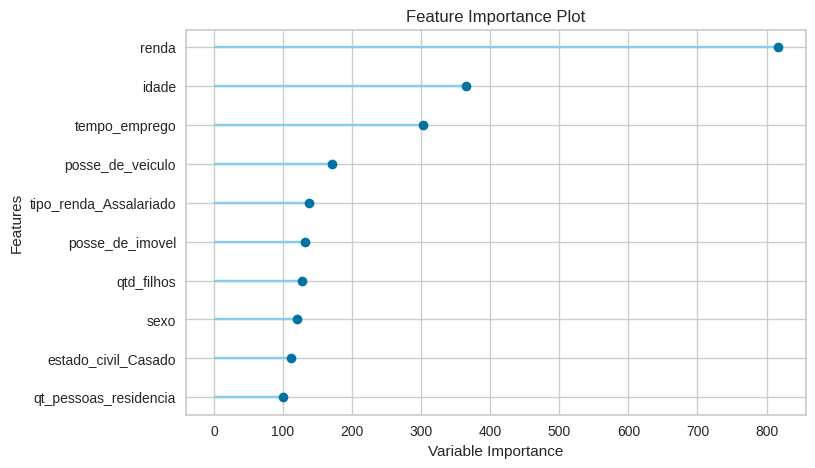

In [90]:
plot_model(best_model, plot='feature')

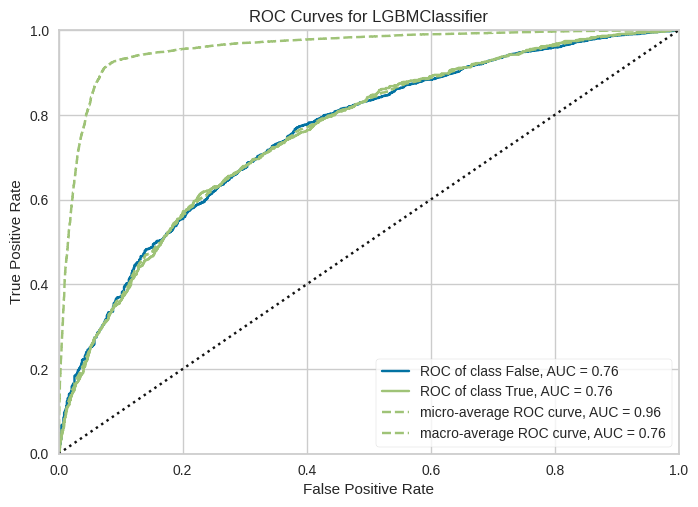

In [91]:
plot_model(best_model, plot='auc')

### Salvar o pickle file do modelo treinado

In [92]:
import pickle

nome_arquivo = 'model_final.pkl'
pickle.dump(best_model, open(nome_arquivo, 'wb'))

### Pycaret na base de dados

In [93]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9199,0.7465,0.0569,0.4615,0.1013,0.0853,0.1405
1,0.9184,0.7593,0.0474,0.3846,0.0844,0.0682,0.1122
2,0.9165,0.7614,0.0427,0.3103,0.0750,0.0569,0.0898
3,0.9211,0.7546,0.0427,0.5294,0.0789,0.0679,0.1336
4,0.9184,0.7757,0.0429,0.3600,0.0766,0.0608,0.1015
5,0.9233,0.7849,0.1143,0.5714,0.1905,0.1686,0.2313
6,0.9199,0.8113,0.0524,0.4400,0.0936,0.0781,0.1304
7,0.9195,0.7754,0.0667,0.4375,0.1157,0.0968,0.1467
8,0.9218,0.7621,0.0952,0.5263,0.1613,0.1405,0.1997


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [94]:
tuned_lightgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9199,0.7421,0.0427,0.4500,0.0779,0.0651,0.1194
1,0.9177,0.7670,0.0332,0.3182,0.0601,0.0458,0.0807
2,0.9158,0.7599,0.0142,0.1579,0.0261,0.0132,0.0247
3,0.9203,0.7611,0.0142,0.4286,0.0275,0.0225,0.0664
4,0.9184,0.7563,0.0429,0.3600,0.0766,0.0608,0.1015
5,0.9218,0.7749,0.0524,0.5500,0.0957,0.0831,0.1520
6,0.9192,0.8108,0.0238,0.3333,0.0444,0.0343,0.0710
7,0.9214,0.7750,0.0333,0.5385,0.0628,0.0541,0.1194
8,0.9199,0.7643,0.0571,0.4444,0.1013,0.0848,0.1373


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [95]:
final_lightgbm = finalize_model(tuned_lightgbm)

In [96]:
evaluate_model(final_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

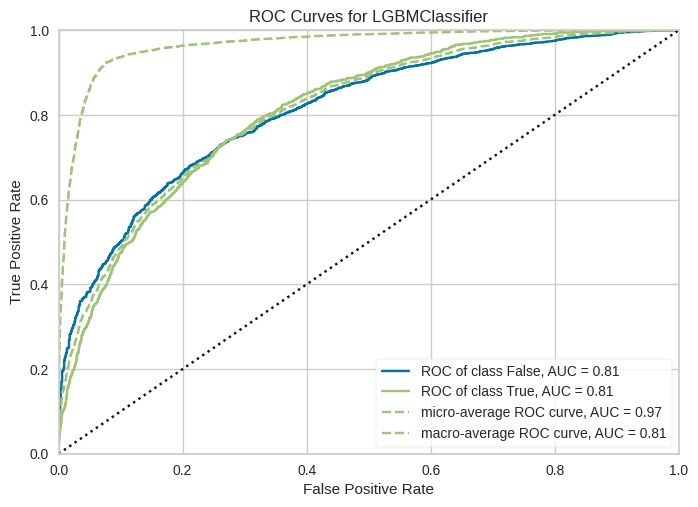

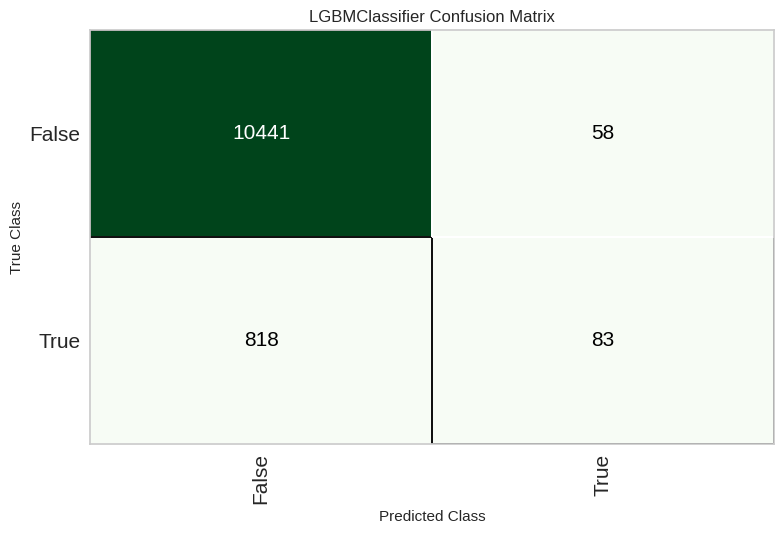

In [97]:
plot_model(final_lightgbm, plot='auc')
plot_model(final_lightgbm, plot='confusion_matrix')

### Salvar arquivo do modelo treinado

In [97]:
nome_arquivo = 'final_lightgbm.pkl'
pickle.dump(final_lightgbm, open(nome_arquivo, 'wb'))